# 3. 로지스틱 회귀 (Logistic Regression)
이진 분류를 수행하는 회귀 방법

---
## 3.1 로지스틱 회귀 (Logistic Regression)

둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 한다. 그리고 이진 분류 문제를 풀기 위한 대표적인 알고리즘이 바로 로지스틱 회귀이다.

### 3.1.1 이진 분류(Binary Classification)

![이진분류2](../image/이진분류2.png)  
  
위의 데이터에서 합격을 1, 불합격을 0이라 할 때, 그래프를 그리면 아래와 같이 나온다.
  
![이진분류1](../image/이진분류1.png)  
  
위 그래프는 알파벳 S자 형태로 표현된다. 이러한 x, y 관계를 표현하기 위해선 직선 함수가 아닌 S자를 그릴 수 있는 함수를 사용해야 한다.


---
### 3.1.2 시그모이드 함수(Sigmoid function)

S자를 그릴 수 있는 대표적인 함수가 시그모이드 함수이다. 시그모이드 함수는 아래와 같이 방정식이 주어진다.  
  
![시그모이드함수](../image/시그모이드함수.png)  
  
선형 회귀에서와 마찬가지로 최적의 W와 b를 찾는 것이 목표이다. 그렇기에 W와 b가 그래프에 어떤 영향을 주는지 알아야 한다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- W = 1, b = 0 일 때, 시그모이드 함수

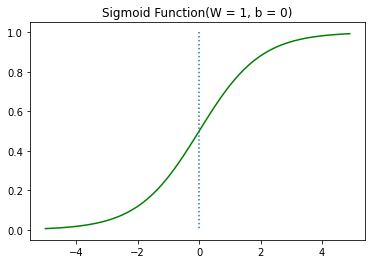

In [3]:
# W = 1, b = 0
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function(W = 1, b = 0)')
plt.show()

- W의 변화에 따른 경사도 변화

C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_14116/3789849332.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y1, 'r', lineStyle='--', label='W = 0.5') # W = 0.5
C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_14116/3789849332.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y3, 'b', lineStyle='--', label='W = 2') # W = 2


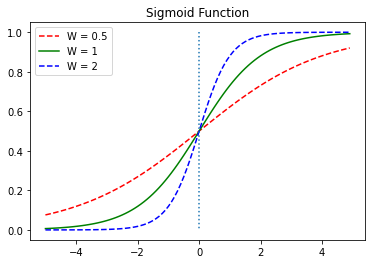

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', lineStyle='--', label='W = 0.5') # W = 0.5
plt.plot(x, y2, 'g', label='W = 1') # W = 1
plt.plot(x, y3, 'b', lineStyle='--', label='W = 2') # W = 2
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

위 그래프를 보면 알 수 있듯이 W는 그래프의 경사도를 결정한다. W가 커지면 경사가 커지고 W가 작아지면 경사가 작아진다.

- b의 변화에 따른 좌, 우 이동

C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_14116/2247807758.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y1, 'r', lineStyle='--', label='b = 0.5') # b = 0.5
C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_14116/2247807758.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y3, 'b', lineStyle='--', label='b = 1.5') # b = 1.5


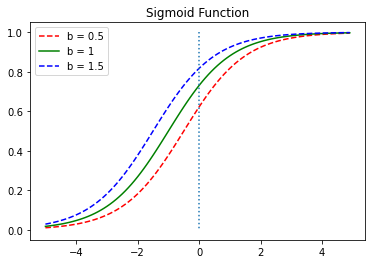

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', lineStyle='--', label='b = 0.5') # b = 0.5
plt.plot(x, y2, 'g', label='b = 1') # b = 1
plt.plot(x, y3, 'b', lineStyle='--', label='b = 1.5') # b = 1.5
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

위 그래프를 보면 알 수 있듯이 b가 커질수록 왼쪽으로, 작아질수록 오른쪽으로 이동하는 것을 볼 수 있다

- 시그모이드 함수를 이용한 분류  
  
  
  
시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고 한없이 작아지면 0에 수렴한다. 즉, 시그모이드 함수는 0과 1 사이의 값을 가지는데 이를 분류 작업에 사용한다. 예를 들어 임계값을 0.5라 정의하면 0.5 이상은 True, 0.5 미만은 False로 판단한다. 이를 확률로 보면 해당 레이블에 속할 확률이 50%가 넘으면 그렇가도 보고 낮으면 아니라고 보는 것이다.





---
### 3.1.3 비용 함수 (Cost function)

H(x)가 시그모이드 함수인 것을 알았으니 이제 W와 b의 최적값을 찾을 수 있는 비용 함수를 정의해야 한다. 우선 선형 회귀에서 사용한 평균 제곱 오차를 사용한 결과다.

![mse](../image/mse.PNG)  
  
  
위의 비용 함수 수식에서 H(x)는 이제 시그모이드 함수다. 이를 미분하면 선형 회귀와 다르게 비볼록 형태의 그림이 나온다.  
  
  
![로지스틱비용](../image/로지스틱비용.png)  
  
  
이와 같은 그래프에 경사 하강법을 사용하면 글로벌 미니멈에 도착하지 못하고 로컬 미니멈이 최적값이라 선택하는 경우가 생긴다. 그렇기에 mse는 로지스틱 회귀 비용 함수에 적합하지 않다.

시그모이드 함수의 특징은 모든 값이 0과 1사이라는 것이다. 즉, 실제값이 1일 때 예측값도 1로, 실제값이 0일 땐 예측값이 0으로 가야 오차가 작아진다. 그리고 이를 충족시키는 것이 로그 함수이다. 밑의 그래프는 y = 0.5에 대칭하는 두 개의 로그 함수다.  
  
  
![로그함수](../image/로그함수.png)  
  
  
실제값이 1일 때 그래프는 주황색, 실제값이 0일 때 그래프는 초록색으로 표시되었다. 만약 실제값이 1인데 예측값이 0이면 오차는 무한대로 발산한다. 그리고 실제값이 0일 땐 반대로 적용된다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같다.  
  
  
![로그함수2](../image/로그함수2.png)  
  
  
y의 실제값에 따라 사용해야 할 그래프가 다르다. 그리고 두 개의 식을 하나로 통합할 수도 있다.  
  
  
![로그함수3](../image/로그함수3.png)  
  
  
실제값이 0이면 덧셈 기호 기준으로 왼쪽 항이 사라지고, 실제값이 1이면 덧셈 기호 기준으로 오른쪽 항이 사라진다. 또한 선형 회귀에서 모든 오차의 평균을 구했던 것처럼 로지스틱 회귀에서도 모든 오차의 평균을 구한다.  
  
  
![로그함수4](../image/로그함수4.png)  
  
  
이제 위의 비용 함수는 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 커지고, 실제값 y와 예측값 H(x)의 차이가 작아지면 cost도 작아진다. 그렇기에 위의 비용 함수에 대하여 경사 하강법을 수행하면서 최적의 W를 찾을 수 있다.  
  
  
![로그함수5](../image/로그함수5.png)

---
### 3.1.4 파이토치로 로지스틱 회귀 구현하기